In [1]:
import pandas as pd
import numpy as np 
from numpy import linalg as la
import matplotlib.pyplot as plt

In [25]:

labels = ['patient ID', 'Malignant/Benign', 'radius (mean)', 'radius (stderr)', 'radius (worst)', 'texture (mean)',
          'texture (stderr)', 'texture (worst)', 'perimeter (mean)', 'perimeter (stderr)', 'perimeter (worst)',
          'area (mean)', 'area (stderr)', 'area (worst)', 'smoothness (mean)', 'smoothness (stderr)',
          'smoothness (worst)', 'compactness (mean)', 'compactness (stderr)', 'compactness (worst)', 'concavity (mean)',
          'concavity (stderr)', 'concavity (worst)', 'concave points (mean)', 'concave points (stderr)',
          'concave points (worst)', 'symmetry (mean)', 'symmetry (stderr)', 'symmetry (worst)',
          'fractal dimension (mean)', 'fractal dimension (stderr)', 'fractal dimension (worst)']

subset_labels = ['concave points (stderr)', 'fractal dimension (stderr)', 'texture (stderr)', 'radius (worst)', 'symmetry (worst)']
tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat", header=None, names=labels)
train_data = tumor_data.iloc[:241,:]
test_data = tumor_data.iloc[241:,:].reset_index()

In [26]:
def MOB(value1):
    if value1 == 'M':
        return 1
    else:
        return -1
    
def lls_solve(A,b) :
    u,s,vt = la.svd(A,full_matrices=False)
    z = u.T@b
    y = np.zeros(len(s), dtype = 'float64')
    for i,v in enumerate(z):
        if s[i] >  0.00000000001:
            y[i] = float(v)/(s[i])
    x = la.solve(vt, y)
    return x

def data_matrix_linear(data):
    A_linear = []
    for label in labels[2:32]: 
        A_lineari = data[label].values.tolist()
        A_linear.append(A_lineari)
    A_linear = np.array(A_linear).T
    return A_linear

def data_matrix_quad(data):
    A = []
    for label in subset_labels:
        A.append(data[label])
    for label in subset_labels:
        A.append(data[label]**2)

    for i in range(len(subset_labels)-1) :
        for j in range(i+1, len(subset_labels)) :
            A.append(data[subset_labels[i]] * data[subset_labels[j]])
    A_quad = np.array(A).T
    return A_quad
    
    

In [27]:
## model fitting: linear and quadratic
        
col = train_data[labels[1]]
b = col.apply(MOB)
b = np.array(b, dtype = 'float64')
A_linear = data_matrix_linear(train_data)
A_quad =  data_matrix_quad(train_data)

## linear least square to find parameters 

weights_linear = lls_solve(A_linear,b)
weights_quad = lls_solve(A_quad,b)


In [33]:
## model validation
# predictions:
A_test_linear = data_matrix_linear(test_data)
A_test_quad =  data_matrix_quad(test_data)
p_linear = A_test_linear@weights_linear
p_quad = A_test_quad@weights_quad
# actual values:
col = test_data[labels[1]]
bnew = col.apply(MOB)
bnew = np.array(bnew, dtype = 'float64')

fp_linear = ((bnew<0) & (p_linear>0)).sum()
fn_linear = ((bnew>0) & (p_linear<0)).sum()
fp_quad = ((bnew<0) & (p_quad>0)).sum()
fn_quad = ((bnew>0) & (p_quad<0)).sum()

<BarContainer object of 4 artists>

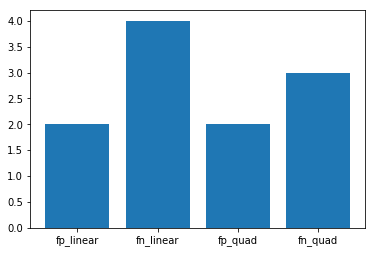

In [34]:
plt.bar(["fp_linear","fn_linear","fp_quad","fn_quad"], height=[fp_linear,fn_linear,fp_quad,fn_quad])